In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import folium
import sys

sys.path.append('../src/')

from initial_data_clean import *
from grouping_functions import *
from stat_functions import *

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
years
year_bins = len(years)
year_bins

18

(array([17704.,     0., 32712.,     0., 34736.,     0., 20016.,     0.,
        10400.,  1272.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

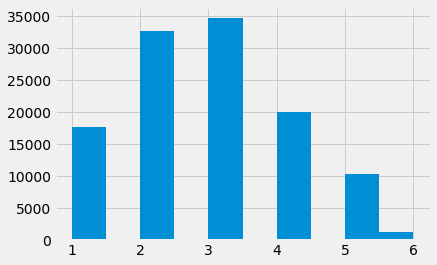

In [4]:
plt.hist(us_county_df['urbanization_code'])

(array([14976., 13048., 10896.,  6520., 10968.,  5288., 14744., 15656.,
        14584., 10160.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

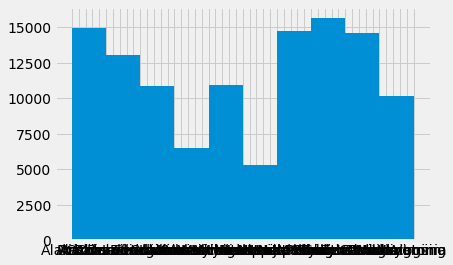

In [5]:
plt.hist(us_county_df['state'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df714da90>]],
      dtype=object)

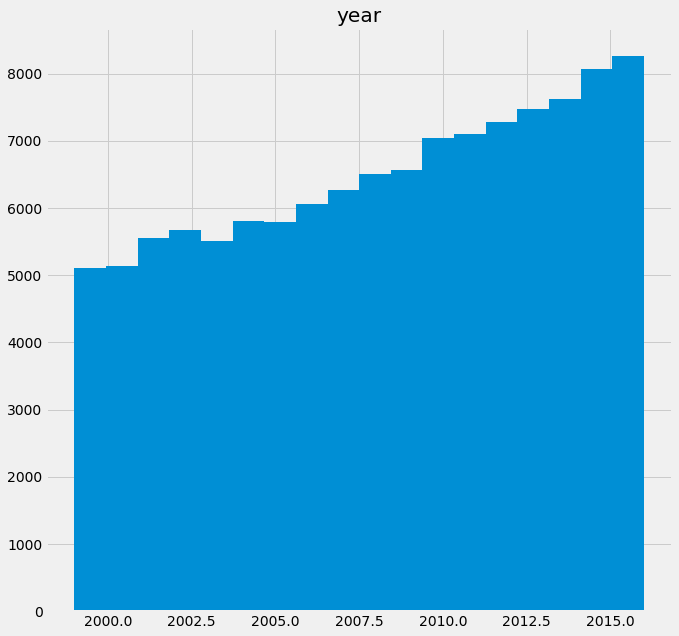

In [6]:
us_county_df.hist('year', figsize=(10,10), bins = len(years))

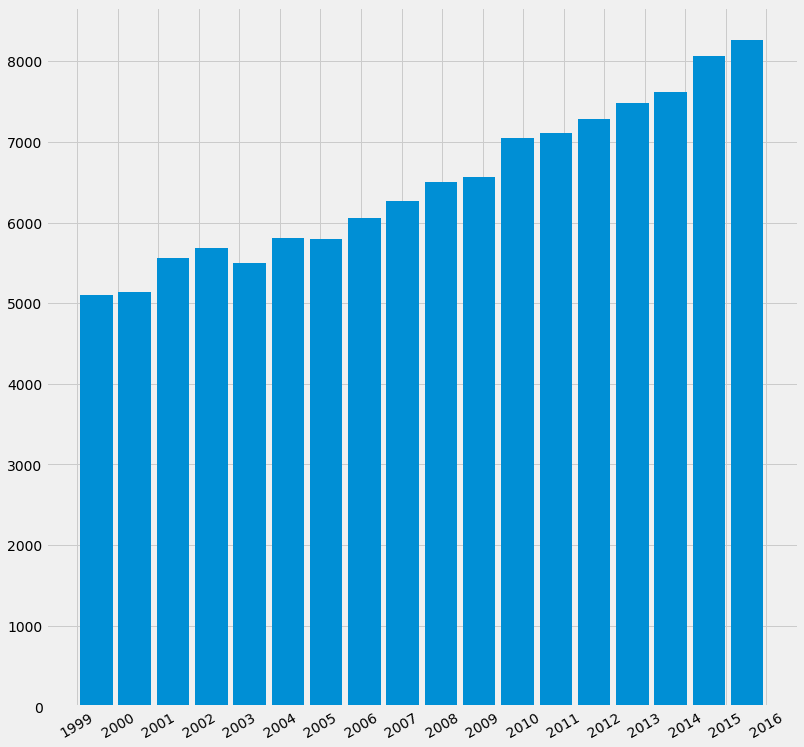

In [7]:
#plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))
data = us_county_df['year']
ax = plt.hist(data, bins = 18, align='mid', rwidth=0.85)
plt.xticks([i for i in range(1999, 2017)], rotation=30)
plt.show()

In [8]:
gb = GroupBy(us_county_agg_df)
gb.county_urbanization_age_rate()
agg_county_metro, agg_county_non_metro = gb.metro_non_metro()

In [9]:
metro_mean, metro_std = get_norm_coef(agg_county_metro)
non_metro_mean, non_metro_std = get_norm_coef(agg_county_non_metro)

In [10]:
def normal_dist(mean, std):
    # This returns Normal dist with desired coefs
    return stats.norm(loc=mean, scale=std)

In [11]:
metro_norm = normal_dist(metro_mean, metro_std)
non_metro_norm = normal_dist(non_metro_mean, non_metro_std)
t_test = stats.ttest_ind(agg_county_metro['age_adjusted_rate'], agg_county_non_metro['age_adjusted_rate'], equal_var=False)
t_test

Ttest_indResult(statistic=-13.952118810769615, pvalue=7.159569963932792e-43)

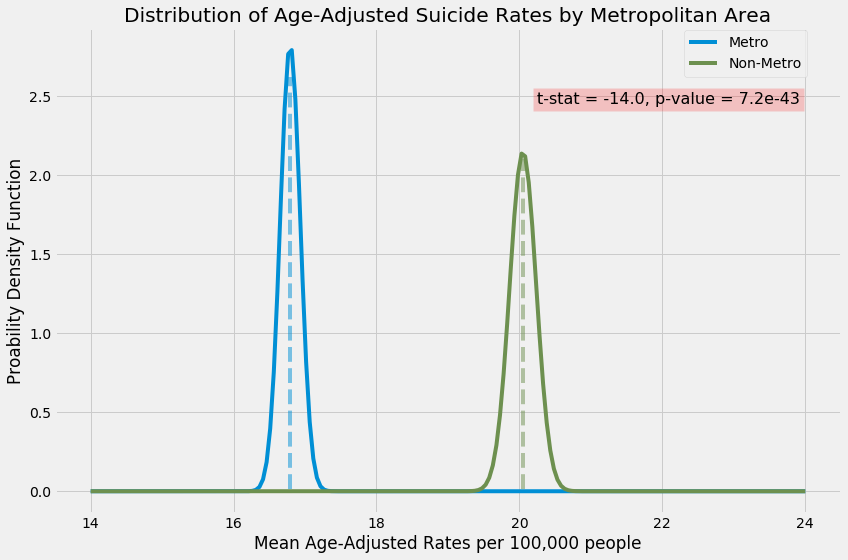

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(14, 24, 200)
ax.plot(x, metro_norm.pdf(x), label='Metro')
ax.plot(x, non_metro_norm.pdf(x), color = '#6d904f', label='Non-Metro')
ax.set_title('Distribution of Age-Adjusted Suicide Rates by Metropolitan Area')
ax.set_xlabel('Mean Age-Adjusted Rates per 100,000 people')
ax.set_ylabel('Proability Density Function')
ax.axvline(metro_mean, ymin=0.05, ymax=0.9, ls='--', alpha = 0.5)
ax.axvline(non_metro_mean, 
           ymin=0.05, ymax=0.73, ls='--', alpha = 0.5, color='#6d904f')
plt.text(x=20.25,y=2.45,
        s=f't-stat = {t_test[0]:.1f}, p-value = 7.2e-43',
        fontsize=16,
        bbox=dict(facecolor='red', alpha=0.2))
plt.legend(loc=(0.8,0.9))
plt.tight_layout()
plt.savefig('../images/metro_non_metro_t_test.png')

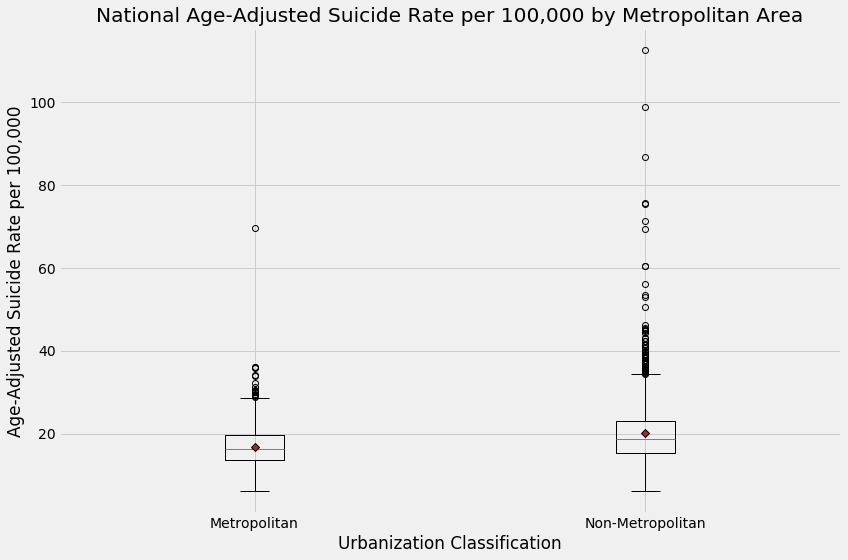

In [13]:
labels = ['Metropolitan', 'Non-Metropolitan']
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(metro_non_metro_box_plot_df(us_county_agg_df), 
           labels=labels, meanprops=meanpointprops, showmeans=True)
ax.set_title('National Age-Adjusted Suicide Rate per 100,000 by Metropolitan Area')
ax.set_xlabel('Urbanization Classification')
ax.set_ylabel('Age-Adjusted Suicide Rate per 100,000')
plt.tight_layout()
plt.savefig('../images/national_metro_non_metro_box_plot.png')
plt.show()

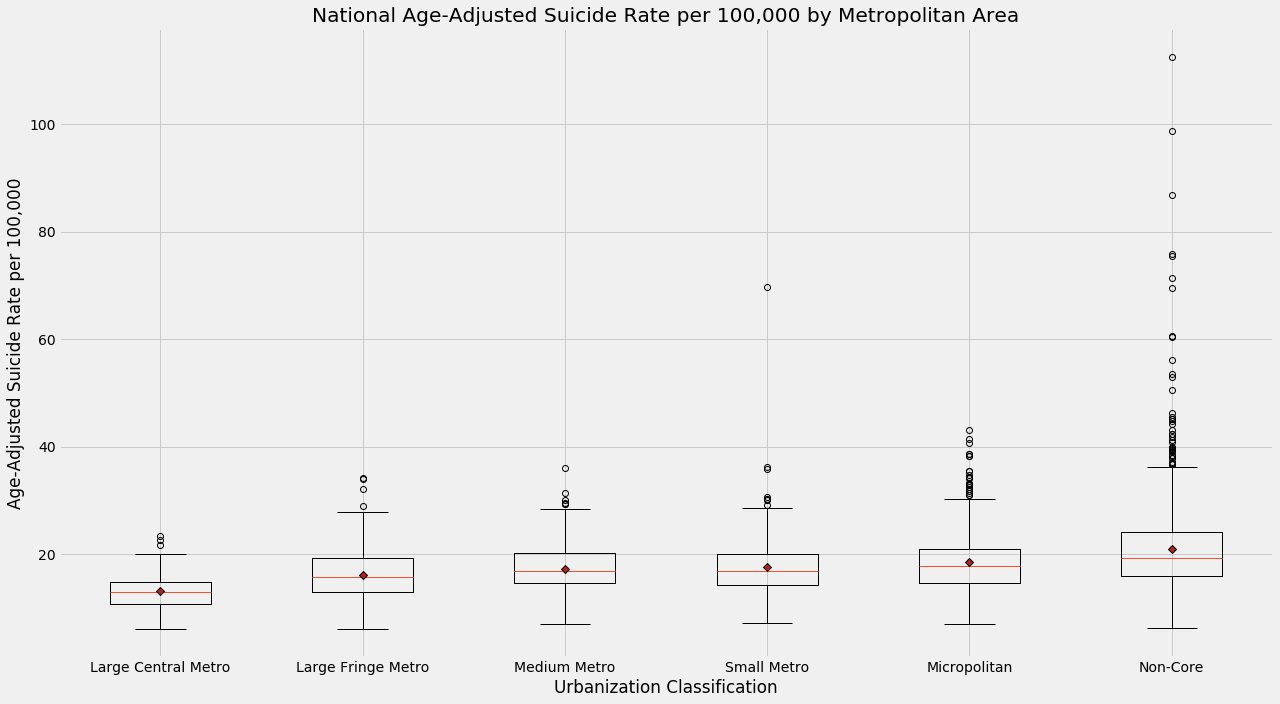

In [14]:
labels = ['Large Central Metro', 'Large Fringe Metro', 'Medium Metro',
         'Small Metro', 'Micropolitan', 'Non-Core']
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
fig, ax = plt.subplots(figsize=(18,10))
ax.boxplot(urbanization_areas_box_plot_df(us_county_agg_df), 
           labels=labels, meanprops=meanpointprops, showmeans=True)
ax.set_title('National Age-Adjusted Suicide Rate per 100,000 by Metropolitan Area')
ax.set_xlabel('Urbanization Classification')
ax.set_ylabel('Age-Adjusted Suicide Rate per 100,000')
plt.tight_layout()
plt.savefig('../images/national_six_metro_areas_box_plot.png')
plt.show()

In [16]:
### NOW WITHOUT ALASKA
gb = GroupBy(us_agg_for_mapping_no_alaska)
gb.county_urbanization_age_rate()
agg_county_no_ak_metro, agg_county_no_ak_non_metro = gb.metro_non_metro()
metro_mean, metro_std = get_norm_coef(agg_county_no_ak_metro)
non_metro_mean, non_metro_std = get_norm_coef(agg_county_no_ak_non_metro)
metro_norm = normal_dist(metro_mean, metro_std)
non_metro_norm = normal_dist(non_metro_mean, non_metro_std)
t_test = stats.ttest_ind(agg_county_no_ak_metro['age_adjusted_rate'], 
                         agg_county_no_ak_non_metro['age_adjusted_rate'], equal_var=False)
t_test

Ttest_indResult(statistic=-13.906341062310139, pvalue=1.3309587747817716e-42)

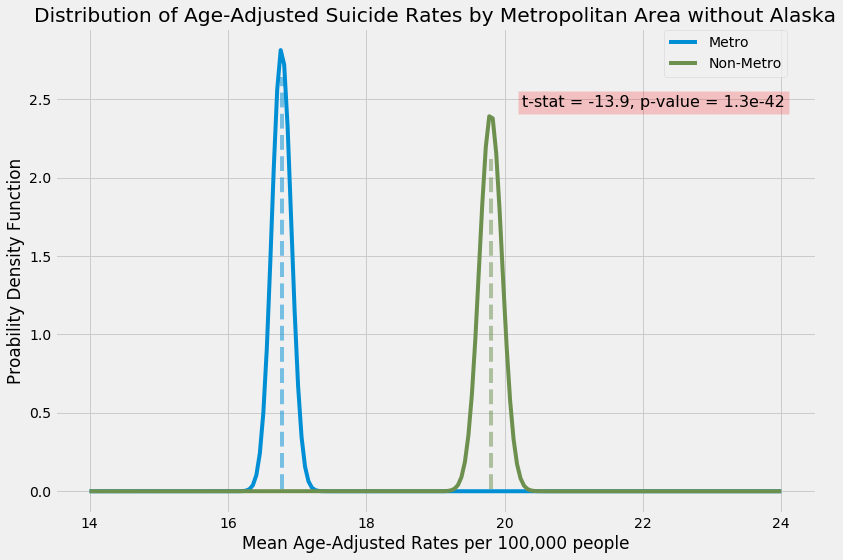

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(14, 24, 200)
ax.plot(x, metro_norm.pdf(x), label='Metro')
ax.plot(x, non_metro_norm.pdf(x), color = '#6d904f', label='Non-Metro')
ax.set_title('Distribution of Age-Adjusted Suicide Rates by Metropolitan Area without Alaska')
ax.set_xlabel('Mean Age-Adjusted Rates per 100,000 people')
ax.set_ylabel('Proability Density Function')
ax.axvline(metro_mean, ymin=0.05, ymax=0.9, ls='--', alpha = 0.5)
ax.axvline(non_metro_mean, 
           ymin=0.05, ymax=0.73, ls='--', alpha = 0.5, color='#6d904f')
plt.text(x=20.25,y=2.45,
        s=f't-stat = {t_test[0]:.1f}, p-value = 1.3e-42',
        fontsize=16,
        bbox=dict(facecolor='red', alpha=0.2))
plt.legend(loc=(0.8,0.9))
plt.tight_layout()
plt.savefig('../images/no_ak_metro_non_metro_t_test.png')

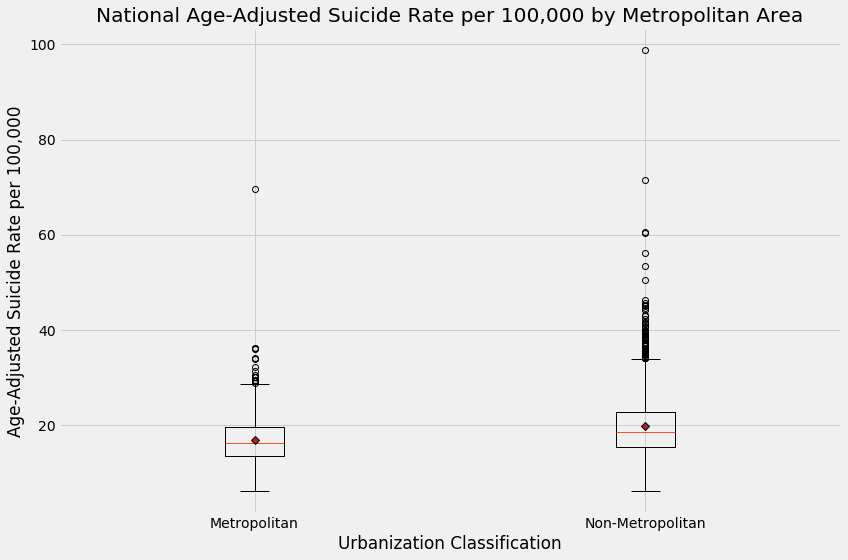

In [18]:
labels = ['Metropolitan', 'Non-Metropolitan']
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(metro_non_metro_box_plot_df(us_agg_for_mapping_no_alaska), 
           labels=labels, meanprops=meanpointprops, showmeans=True)
ax.set_title('National Age-Adjusted Suicide Rate per 100,000 by Metropolitan Area')
ax.set_xlabel('Urbanization Classification')
ax.set_ylabel('Age-Adjusted Suicide Rate per 100,000')
plt.tight_layout()
plt.savefig('../images/no_alaska_metro_non_metro_box_plot.png')
plt.show()

In [21]:
import branca
import selenium
import json
import requests

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = us_agg_for_mapping
county_geo = f'{url}/us_counties_20m_topo.json'


df = us_agg_for_mapping

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 120)
colorscale = colorscale.to_step(index=[0, 10, 20, 30, 40, 50, 60, 
                                       70, 80, 90, 100, 110, 120])
colorscale.caption = 'Aggregated Age-Adjusted Suicide Rates by County'
county_series = df.set_index('county_code')['age_adjusted_rate']


def style_function(feature):
    county = county_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if county is None else colorscale(county)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3,
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

colorscale.add_to(m)
m.save('../images/us_counties_aggregate_chloropleth_USA.html')
m

In [26]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = us_agg_for_mapping_no_alaska
county_geo = f'{url}/us_counties_20m_topo.json'


df = us_agg_for_mapping_no_alaska

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 120)
colorscale = colorscale.to_step(index=[0, 10, 20, 30, 40, 50, 60, 
                                       70, 80, 90, 100])
colorscale.caption = 'Aggregated Age-Adjusted Suicide Rates by County (without Alaska)'
county_series = df.set_index('county_code')['age_adjusted_rate']


def style_function(feature):
    county = county_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if county is None else colorscale(county)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3,
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

colorscale.add_to(m)
m.save('../images/us_counties_aggregate_chloropleth_USA_no_alaska.html')
m